Fichier brouillon servant de test pour les unification de data set.

Attention, fichier de travail plus à jour.

In [1]:
import pandas as pd
import seaborn as sns

path = "C:/Users/pierr/Documents/1_projet_python/Valeur_fonciere/Depot_data/"
#path = "C:/Users/pterron/Documents/projet_python/Application_ml/Depot_data/"

url = 'https://github.com/Pioterr/projet_sise_stock/blob/main/concat.zip?raw=true'

#Test sur le csv concat
D = pd.read_csv(filepath_or_buffer= path + "concat_prix_m2.zip", sep="|", decimal=",", compression = 'zip')
#D = pd.read_csv(filepath_or_buffer= url ,sep='|', compression='zip')

C:\Users\pierr\AppData\Local\Temp\ipykernel_18528\3710640052.py:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  D = pd.read_csv(filepath_or_buffer= path + "concat_prix_m2.zip", sep="|", decimal=",", compression = 'zip')


# Data set de base

In [2]:
df = D

In [3]:
df.shape

(1955342, 18)

In [13]:
moy_region = df.groupby(['Code departement','year','Type local'], as_index=False)['Valeur fonciere'].mean()

In [18]:
moy_region.to_csv(path_or_buf= path + "vf_dep_allyear.csv", sep = ",", index= False)

In [17]:
moy_region[(moy_region['Type local'] == 'Local industriel. commercial ou assimilé') & (moy_region['year'] == 2021)]

,Code departement,year,Type local,Valeur fonciere
14,1,2021,Local industriel. commercial ou assimilé,144458.757143
30,10,2021,Local industriel. commercial ou assimilé,91695.666667
46,11,2021,Local industriel. commercial ou assimilé,100222.340426
62,12,2021,Local industriel. commercial ou assimilé,74110.444444
78,13,2021,Local industriel. commercial ou assimilé,213839.194175
...,...,...,...,...
1483,95,2021,Local industriel. commercial ou assimilé,220780.487805
1497,971,2021,Local industriel. commercial ou assimilé,208012.823529
1513,972,2021,Local industriel. commercial ou assimilé,183923.772727
1526,973,2021,Local industriel. commercial ou assimilé,170669.285714


In [4]:
df.head()

,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,year,Prix m2 moyen region,Prix m2 moyen commune
0,Vente,90000,RUE,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,1.0,Maison,150.0,3,1,347.0,1,2018,2000.4901120239663,1595.0383631468817
1,Vente,67000,ALL,1000.0,BOURG-EN-BRESSE,1,53,1,2.0,Appartement,45.0,1,0,0.0,1,2018,2000.4901120239663,1473.5088116995666
2,Vente,76200,RUE,1000.0,BOURG-EN-BRESSE,1,53,2,2.0,Appartement,68.0,3,0,0.0,1,2018,2000.4901120239663,1473.5088116995666
3,Vente,130000,RUE,1160.0,VARAMBON,1,430,0,1.0,Maison,80.0,3,1,55.0,1,2018,2000.4901120239663,1388.5785007072136
4,Vente,224750,RUE,1160.0,PRIAY,1,314,0,1.0,Maison,115.0,5,1,673.0,1,2018,2000.4901120239663,1835.850009221202


In [5]:
df = df.drop(labels=['Code type local', 'Nature culture', 'Nature mutation','Nombre de lots'], axis=1)

In [6]:
d_type = {
    'Commune' : 'str',
    'Code commune' : 'str',
    'Code departement' : 'str',
    'Code postal' : 'str',
    'Valeur fonciere' : 'float',
    'Surface reelle bati' : 'float',
    'Nombre pieces principales' : 'float',
    'Surface terrain' : 'float'
}


df = df.astype(d_type)
#df['Date mutation'] = pd.to_datetime(df['Date mutation'], format="%d/%m/%Y")
#df[['Valeur fonciere','Nombre pieces principales']] = df[['Valeur fonciere','Nombre pieces principales']].astype('int')



In [8]:
df['Code departement'] = df['Code departement'].str.zfill(2)

In [ ]:
df['month'] = df['Date mutation'].dt.month
df['year'] = df['Date mutation'].dt.year
df = df.drop(labels='Date mutation', axis=1)

In [ ]:
df.head()

,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,month,year
0,90000,RUE,1380.0,SAINT-CYR-SUR-MENTHON,01,343,Maison,150.0,3,347.0,1,2018
1,67000,ALL,1000.0,BOURG-EN-BRESSE,01,53,Appartement,45.0,1,0.0,1,2018
2,76200,RUE,1000.0,BOURG-EN-BRESSE,01,53,Appartement,68.0,3,0.0,1,2018
3,130000,RUE,1160.0,VARAMBON,01,430,Maison,80.0,3,55.0,1,2018
4,224750,RUE,1160.0,PRIAY,01,314,Maison,115.0,5,673.0,1,2018


# Latitude longitude

In [9]:
#Import des données
lat = pd.read_csv(filepath_or_buffer= path + "communes-departement-region.csv", sep=",", decimal=".")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955342 entries, 0 to 1955341
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Valeur fonciere            float64
 1   Type de voie               object 
 2   Code postal                object 
 3   Commune                    object 
 4   Code departement           object 
 5   Code commune               object 
 6   Type local                 object 
 7   Surface reelle bati        float64
 8   Nombre pieces principales  float64
 9   Surface terrain            float64
 10  month                      int64  
 11  year                       int64  
 12  Prix m2 moyen region       object 
 13  Prix m2 moyen commune      object 
dtypes: float64(4), int64(2), object(8)
memory usage: 208.9+ MB


In [11]:
d_type = {
    'Commune' : 'str',
    'Code commune' : 'float',
    'Code departement' : 'str',
    'Code postal' : 'str',
    'Valeur fonciere' : 'float',
    'Surface reelle bati' : 'float',
    'Nombre pieces principales' : 'float',
    'Surface terrain' : 'float'
}


df = df.astype(d_type)
df['Code commune'] = df['Code commune'].astype(int).astype(str)

In [16]:
lat.head()

,code_commune_INSEE,nom_commune_postal,code_postal,latitude,longitude,code_commune,code_departement
0,1001,L ABERGEMENT CLEMENCIAT,1400,46.153426,4.926114,1.0,1
1,1002,L ABERGEMENT DE VAREY,1640,46.009188,5.428017,2.0,1
2,1004,AMBERIEU EN BUGEY,1500,45.960848,5.372926,4.0,1
3,1005,AMBERIEUX EN DOMBES,1330,45.996180,4.912273,5.0,1
4,1006,AMBLEON,1300,45.749499,5.594320,6.0,1


In [ ]:
lat.shape

(39201, 15)

In [ ]:
lat.isna().sum()

code_commune_INSEE          0
nom_commune_postal          0
code_postal                 0
libelle_acheminement        0
ligne_5                 35944
latitude                  269
longitude                 269
code_commune                7
article                 36621
nom_commune                 0
nom_commune_complet         0
code_departement            7
nom_departement           267
code_region               267
nom_region                267
dtype: int64

In [ ]:
lat.columns

Index(['code_commune_INSEE', 'nom_commune_postal', 'code_postal',
       'libelle_acheminement', 'ligne_5', 'latitude', 'longitude',
       'code_commune', 'article', 'nom_commune', 'nom_commune_complet',
       'code_departement', 'nom_departement', 'code_region', 'nom_region'],
      dtype='object')

In [13]:
#On vire les valeurs qui ne nous interesse pas
lat = lat[['code_commune_INSEE','nom_commune_postal','code_postal','latitude', 'longitude','code_commune','code_departement']]

In [14]:
lat = lat.dropna(axis=0)

In [15]:
lat.shape

(38932, 7)

In [ ]:
#Trasntypage
d_type = {
    'code_commune_INSEE':'str',
    'nom_commune_postal':'str',
    'code_postal':'float',
    'latitude':'float',
    'longitude':'float',
    'code_commune':'float',
    'code_departement':'str'
}


lat = lat.astype(d_type)
lat['code_commune'] = lat['code_commune'].astype(int).astype(str)
lat['code_postal'] = lat['code_postal'].astype(str)

In [ ]:
print(lat.info())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38932 entries, 0 to 38936
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code_commune_INSEE  38932 non-null  object 
 1   nom_commune_postal  38932 non-null  object 
 2   code_postal         38932 non-null  object 
 3   latitude            38932 non-null  float64
 4   longitude           38932 non-null  float64
 5   code_commune        38932 non-null  object 
 6   code_departement    38932 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979261 entries, 0 to 1979260
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Valeur fonciere            int32  
 1   Type de voie               object 
 2   Code postal                object 
 3   Commune                    object 
 4   Code departement           object 
 5   C

In [73]:
lat_fu = lat[['code_departement','code_commune','code_postal', 'latitude', 'longitude']]
lat_fu = lat_fu.rename(columns={'code_departement': 'Code departement', 'code_commune': 'Code commune', 'code_postal' : 'Code postal'})

In [39]:
lat_fu.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38932 entries, 0 to 38936
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code departement  38932 non-null  object 
 1   Code commune      38932 non-null  object 
 2   Code postal       38932 non-null  object 
 3   latitude          38932 non-null  float64
 4   longitude         38932 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955342 entries, 0 to 1955341
Data columns (total 18 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Nature mutation            object 
 1   Valeur fonciere            float64
 2   Type de voie               object 
 3   Code postal                object 
 4   Commune                    object 
 5   Code departement           object 
 6   Code commune               float64
 7   Nombre de lots             int64  
 8 

In [76]:
lat_fu2[(lat_fu2['Code departement'] == '1') & (lat_fu2['Code commune'] == '53') ]

,Code departement,Code commune,Code postal,latitude,longitude
54,1,53,1000.0,46.205152,5.246021


In [55]:
lat_fu2 = lat_fu.drop_duplicates(inplace = True)

In [75]:
lat_fu2.head()

,Code departement,Code commune,Code postal,latitude,longitude
0,1,1,1400.0,46.153426,4.926114
1,1,2,1640.0,46.009188,5.428017
2,1,4,1500.0,45.960848,5.372926
3,1,5,1330.0,45.996180,4.912273
4,1,6,1300.0,45.749499,5.594320


In [84]:
#Union des deux tables
result = pd.merge(left=df, right=lat_fu2, on=['Code departement','Code commune', 'Code postal'], how='left')
#result.drop_duplicates(ignore_index=True, inplace=True)

In [85]:
df.shape
result.shape

(1955342, 18)

In [86]:
result.shape

(1955342, 20)

In [92]:
result.head()

,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,year,Prix m2 moyen region,Prix m2 moyen commune,latitude,longitude
0,Vente,90000.0,RUE,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,1.0,Maison,150.0,3.0,1,347.0,1,2018,2000.4901120239663,1595.0383631468817,46.275401,4.967571
1,Vente,67000.0,ALL,1000.0,BOURG-EN-BRESSE,1,53,1,2.0,Appartement,45.0,1.0,0,0.0,1,2018,2000.4901120239663,1473.5088116995666,46.205152,5.246021
2,Vente,76200.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,2,2.0,Appartement,68.0,3.0,0,0.0,1,2018,2000.4901120239663,1473.5088116995666,46.205152,5.246021
3,Vente,130000.0,RUE,1160.0,VARAMBON,1,430,0,1.0,Maison,80.0,3.0,1,55.0,1,2018,2000.4901120239663,1388.5785007072136,46.043393,5.294794
4,Vente,224750.0,RUE,1160.0,PRIAY,1,314,0,1.0,Maison,115.0,5.0,1,673.0,1,2018,2000.4901120239663,1835.850009221202,46.019752,5.285234


In [88]:
df.head()

,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,year,Prix m2 moyen region,Prix m2 moyen commune
0,Vente,90000.0,RUE,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,1.0,Maison,150.0,3.0,1,347.0,1,2018,2000.4901120239663,1595.0383631468817
1,Vente,67000.0,ALL,1000.0,BOURG-EN-BRESSE,1,53,1,2.0,Appartement,45.0,1.0,0,0.0,1,2018,2000.4901120239663,1473.5088116995666
2,Vente,76200.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,2,2.0,Appartement,68.0,3.0,0,0.0,1,2018,2000.4901120239663,1473.5088116995666
3,Vente,130000.0,RUE,1160.0,VARAMBON,1,430,0,1.0,Maison,80.0,3.0,1,55.0,1,2018,2000.4901120239663,1388.5785007072136
4,Vente,224750.0,RUE,1160.0,PRIAY,1,314,0,1.0,Maison,115.0,5.0,1,673.0,1,2018,2000.4901120239663,1835.850009221202


In [67]:
path = "C:/Users/pterron/Documents/projet_python/Application_ml/Depot_data/"
result.to_csv(path_or_buf= path + "concat_lat_longi.csv", sep = ",", index= False)

In [95]:
result.shape

(1955342, 20)

In [93]:
result[result['latitude'].isna()]

,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,year,Prix m2 moyen region,Prix m2 moyen commune,latitude,longitude
2674,Vente,57000.0,RUE,1510.0,CHAZEY-BONS,1,98,0,1.0,Maison,52.0,3.0,1,76.0,11,2018,2000.4901120239663,1622.2761395381365,NaN,NaN
24038,Vente,40500.0,RTE,7510.0,ASTET,7,18,0,1.0,Maison,85.0,5.0,1,1130.0,3,2018,1649.29557772915,460.4575163398693,NaN,NaN
24351,Vente,40000.0,CHE,7660.0,ASTET,7,18,0,1.0,Maison,90.0,3.0,1,141.0,5,2018,1649.29557772915,460.4575163398693,NaN,NaN
25245,Vente,177000.0,RUE,7000.0,SAINT-MICHEL-DE-BOULOGNE,7,277,0,1.0,Maison,95.0,2.0,1,250.0,12,2018,1649.29557772915,2517.723525681674,NaN,NaN
26525,Vente,13000.0,RUE,8500.0,ROCROI,8,367,0,1.0,Maison,51.0,1.0,1,146.0,2,2018,1194.422728697904,1135.9978891744754,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942043,Vente,55000.0,RUE,97150.0,SAINT MARTIN,971,27,1,2.0,Appartement,26.0,1.0,0,0.0,12,2021,2566.9685420447067,2942.7207797186693,NaN,NaN
1942044,Vente,126500.0,LOT,97150.0,SAINT MARTIN,971,27,1,2.0,Appartement,34.0,2.0,0,0.0,11,2021,2566.9685420447067,2942.7207797186693,NaN,NaN
1942045,Vente,235000.0,RUE,97150.0,SAINT MARTIN,971,27,1,2.0,Appartement,93.0,3.0,0,0.0,8,2021,2566.9685420447067,2942.7207797186693,NaN,NaN
1942047,Vente,230000.0,RUE,97150.0,SAINT MARTIN,971,27,1,2.0,Appartement,80.0,3.0,0,0.0,7,2021,2566.9685420447067,2942.7207797186693,NaN,NaN


In [98]:
#On remplace les valeurs nulles par zero
values = {"latitude": 0, "longitude":0}
result2 = result.fillna(value = values)

In [100]:
result2.shape

(1955342, 20)

In [102]:
result2[result2['latitude'] == 0]

,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,year,Prix m2 moyen region,Prix m2 moyen commune,latitude,longitude
2674,Vente,57000.0,RUE,1510.0,CHAZEY-BONS,1,98,0,1.0,Maison,52.0,3.0,1,76.0,11,2018,2000.4901120239663,1622.2761395381365,0.0,0.0
24038,Vente,40500.0,RTE,7510.0,ASTET,7,18,0,1.0,Maison,85.0,5.0,1,1130.0,3,2018,1649.29557772915,460.4575163398693,0.0,0.0
24351,Vente,40000.0,CHE,7660.0,ASTET,7,18,0,1.0,Maison,90.0,3.0,1,141.0,5,2018,1649.29557772915,460.4575163398693,0.0,0.0
25245,Vente,177000.0,RUE,7000.0,SAINT-MICHEL-DE-BOULOGNE,7,277,0,1.0,Maison,95.0,2.0,1,250.0,12,2018,1649.29557772915,2517.723525681674,0.0,0.0
26525,Vente,13000.0,RUE,8500.0,ROCROI,8,367,0,1.0,Maison,51.0,1.0,1,146.0,2,2018,1194.422728697904,1135.9978891744754,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942043,Vente,55000.0,RUE,97150.0,SAINT MARTIN,971,27,1,2.0,Appartement,26.0,1.0,0,0.0,12,2021,2566.9685420447067,2942.7207797186693,0.0,0.0
1942044,Vente,126500.0,LOT,97150.0,SAINT MARTIN,971,27,1,2.0,Appartement,34.0,2.0,0,0.0,11,2021,2566.9685420447067,2942.7207797186693,0.0,0.0
1942045,Vente,235000.0,RUE,97150.0,SAINT MARTIN,971,27,1,2.0,Appartement,93.0,3.0,0,0.0,8,2021,2566.9685420447067,2942.7207797186693,0.0,0.0
1942047,Vente,230000.0,RUE,97150.0,SAINT MARTIN,971,27,1,2.0,Appartement,80.0,3.0,0,0.0,7,2021,2566.9685420447067,2942.7207797186693,0.0,0.0


# Prix au m²

In [17]:
#Prix au m²

#On vire les locals
df_m2 = df[df['Type local'] != 'Dépendance']


In [18]:
df_m2 = df_m2[df_m2['Surface reelle bati']!=0]

In [19]:
df_m2.isna().sum()

Valeur fonciere              0
Type de voie                 0
Code postal                  0
Commune                      0
Code departement             0
Code commune                 0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
month                        0
year                         0
Prix m2 moyen region         0
Prix m2 moyen commune        0
dtype: int64

In [28]:


df_m2['prix_m2'] = df_m2['Valeur fonciere'] / df_m2['Surface reelle bati']

# Création d'une nouvelle colonne 'moy_prix_m2' 
#dfc['moy_prix_m2'] = dfc.groupby(['Annee', 'Code departement'])['prix_m2'].transform('mean')

In [29]:
group = df_m2.groupby(['Code departement', 'year'], as_index=False)

In [30]:
df_test = pd.DataFrame(group['prix_m2'].mean())

In [31]:
df_test = df_test.rename(columns={'prix_m2': 'Prix m2 moyen region'})

In [32]:
df_test

,Code departement,year,Prix m2 moyen region
0,01,2018,2005.485457
1,01,2019,2068.344315
2,01,2020,2161.311808
3,01,2021,2314.410827
4,02,2018,1158.877916
...,...,...,...
383,973,2021,2299.279478
384,974,2018,2279.292851
385,974,2019,2384.292129
386,974,2020,2474.161875


In [33]:
df_test[(df_test['Code departement'] == '75') ]

,Code departement,year,Prix m2 moyen region
288,75,2018,8795.354601
289,75,2019,9363.629452
290,75,2020,10018.335602
291,75,2021,10057.827067


In [34]:
df_test

,Code departement,year,Prix m2 moyen region
0,01,2018,2005.485457
1,01,2019,2068.344315
2,01,2020,2161.311808
3,01,2021,2314.410827
4,02,2018,1158.877916
...,...,...,...
383,973,2021,2299.279478
384,974,2018,2279.292851
385,974,2019,2384.292129
386,974,2020,2474.161875


In [35]:
#Test de merge
prixm2_r = pd.merge(left=df, right=df_test, on=['Code departement','year'], how='left')

In [36]:
prixm2_r[prixm2_r['Code departement'] == '69']['Commune']

329571               LYON 9EME
329572                LYON 1ER
329573     FONTAINES SUR SAONE
329574               LYON 2EME
329575        CALUIRE ET CUIRE
                  ...         
1852391          SAINT-FORGEUX
1852392                  ARNAS
1852393           VILLEFRANCHE
1852394               VALSONNE
1852395              AMPLEPUIS
Name: Commune, Length: 43655, dtype: object

In [37]:
prixm2_r.loc[(prixm2_r['Commune'] == '') & (prixm2_r['year'] == 2018)]['Prix m2 moyen region']

Series([], Name: Prix m2 moyen region, dtype: float64)

<Axes: xlabel='year', ylabel='Prix m2 moyen region'>

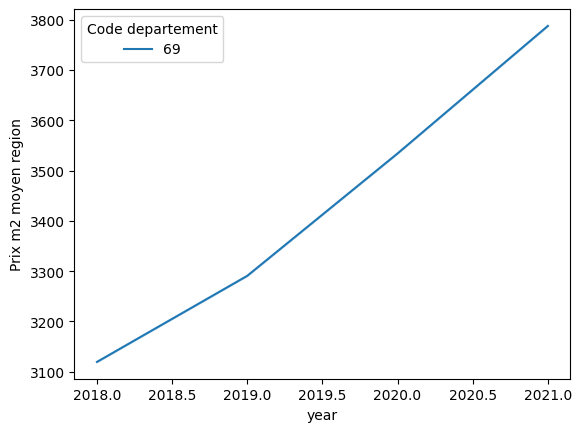

In [38]:
sns.lineplot(data = prixm2_r[prixm2_r['Code departement'] == '69'], x = 'year', y = 'Prix m2 moyen region', hue='Code departement')

In [39]:
tab = pd.pivot_table(prixm2_r, values='Prix m2 moyen region', index=['Code departement'], columns='year')
tab

year,2018,2019,2020,2021
Code departement,,,,
01,2005.485457,2068.344315,2161.311808,2314.410827
02,1158.877916,1156.406372,1196.319668,1274.313826
03,1057.256474,1061.119648,1085.033048,1131.529783
04,1841.793340,1901.910819,2001.746193,2028.861040
05,2197.853154,2186.124875,2231.937251,2367.341260
...,...,...,...,...
95,3204.197134,3307.183493,3440.992598,3631.448475
971,2230.156999,2377.600770,2437.512127,2564.870848
972,2104.997340,2123.172623,2301.512310,2299.279629


# Prix par commune

In [40]:
groupe = df_m2.groupby(['Code departement','Commune', 'year'], as_index=False)
df_p_com = pd.DataFrame(groupe['prix_m2'].mean())
df_p_com = df_p_com.rename(columns={'prix_m2': 'Prix m2 moyen commune'})

In [41]:
df_p_com

,Code departement,Commune,year,Prix m2 moyen commune
0,01,ABERGEMENT-DE-VAREY (L ),2018,1397.623382
1,01,ABERGEMENT-DE-VAREY (L ),2019,1103.390576
2,01,ABERGEMENT-DE-VAREY (L ),2020,2022.908835
3,01,AMBERIEU-EN-BUGEY,2018,1950.391821
4,01,AMBERIEU-EN-BUGEY,2019,2015.385614
...,...,...,...,...
111920,974,SAINTE SUZANNE,2021,2284.268126
111921,974,SALAZIE,2018,1203.002080
111922,974,SALAZIE,2019,854.955472
111923,974,SALAZIE,2020,970.654807


In [42]:
#Test de merge
prixm2_c = pd.merge(left=df, right=df_p_com, on=['Code departement','year','Commune'], how='left')
prixm2_c

,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,month,year,Prix m2 moyen commune
0,90000,RUE,1380.0,SAINT-CYR-SUR-MENTHON,01,343,Maison,150.0,3,347.0,1,2018,1595.038363
1,67000,ALL,1000.0,BOURG-EN-BRESSE,01,53,Appartement,45.0,1,0.0,1,2018,1465.167185
2,76200,RUE,1000.0,BOURG-EN-BRESSE,01,53,Appartement,68.0,3,0.0,1,2018,1465.167185
3,130000,RUE,1160.0,VARAMBON,01,430,Maison,80.0,3,55.0,1,2018,1388.578501
4,224750,RUE,1160.0,PRIAY,01,314,Maison,115.0,5,673.0,1,2018,1835.850009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979256,293500,RUE,75002.0,PARIS 02,75,102,Appartement,32.0,1,0.0,3,2021,10903.066063
1979257,190000,RUE,75002.0,PARIS 02,75,102,Appartement,15.0,1,0.0,3,2021,10903.066063
1979258,230000,RUE,75002.0,PARIS 02,75,102,Appartement,15.0,1,0.0,3,2021,10903.066063
1979259,383000,RUE,75004.0,PARIS 04,75,104,Appartement,30.0,2,0.0,3,2021,11137.488746


In [43]:
prixm2_c.loc[(prixm2_c['Commune'] == 'BOURG-EN-BRESSE') & (prixm2_c['year'] == 2020)]

,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,month,year,Prix m2 moyen commune
1054220,180300,RUE,1000.0,BOURG-EN-BRESSE,01,53,Maison,75.0,4,525.0,1,2020,1742.569664
1054221,54800,AV,1000.0,BOURG-EN-BRESSE,01,53,Appartement,32.0,1,0.0,1,2020,1742.569664
1054222,97000,RUE,1000.0,BOURG-EN-BRESSE,01,53,Appartement,92.0,3,0.0,1,2020,1742.569664
1054225,99000,RUE,1000.0,BOURG-EN-BRESSE,01,53,Appartement,91.0,4,0.0,1,2020,1742.569664
1054228,70000,RUE,1000.0,BOURG-EN-BRESSE,01,53,Appartement,45.0,2,0.0,1,2020,1742.569664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055323,80000,BD,1000.0,BOURG-EN-BRESSE,01,53,Appartement,74.0,4,0.0,12,2020,1742.569664
1055327,60000,QUAI,1000.0,BOURG-EN-BRESSE,01,53,Appartement,46.0,2,0.0,12,2020,1742.569664
1055336,178000,RUE,1000.0,BOURG-EN-BRESSE,01,53,Maison,82.0,4,530.0,12,2020,1742.569664
1055345,298573,RUE,1000.0,BOURG-EN-BRESSE,01,53,Appartement,121.0,4,0.0,12,2020,1742.569664


<Axes: xlabel='year', ylabel='Prix m2 moyen commune'>

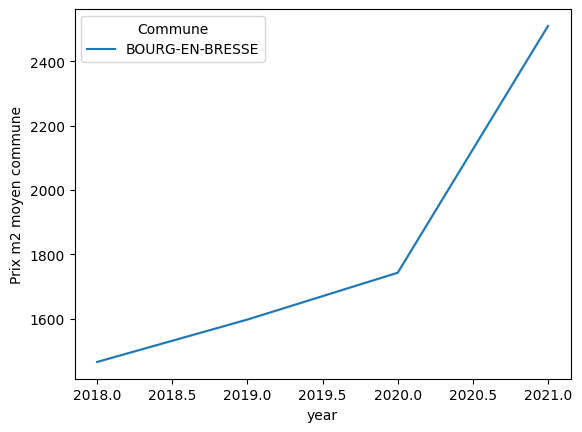

In [44]:
sns.lineplot(data = prixm2_c.loc[prixm2_c['Commune'] == 'BOURG-EN-BRESSE'], x = 'year', y = 'Prix m2 moyen commune', hue='Commune')

In [45]:
prixm2_c.isna().sum()

Valeur fonciere                0
Type de voie                   0
Code postal                    0
Commune                        0
Code departement               0
Code commune                   0
Type local                     0
Surface reelle bati            0
Nombre pieces principales      0
Surface terrain                0
month                          0
year                           0
Prix m2 moyen commune        636
dtype: int64

# Prix m² CSV

In [26]:
import pandas as pd
path = "C:/Users/pierr/Documents/1_projet_python/Valeur_fonciere/Depot_data/"

#Test sur le csv concat
df_prix = pd.read_csv(filepath_or_buffer= path + "concat_prix_m2_lati.csv", sep="|", decimal=",")

C:\Users\pierr\AppData\Local\Temp\ipykernel_3796\789605397.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_prix = pd.read_csv(filepath_or_buffer= path + "concat_prix_m2_lati.csv", sep="|", decimal=",")


In [30]:
df_prix[df_prix['year'] == 2019]['Valeur fonciere'].astype(float).describe().apply(lambda x: format(x, 'f'))

count    542601.000000
mean     165916.966930
std      103587.182530
min           0.000000
25%       86750.000000
50%      146000.000000
75%      225000.000000
max      498000.000000
Name: Valeur fonciere, dtype: object

In [18]:
df_prix[(df_prix['Type local'] == 'Local industriel. commercial ou assimilé') & (df_prix['year'] == 2020)]['Valeur fonciere'].astype(float).describe()

count      4659.000000
mean     123368.859627
std      103545.727122
min           0.000000
25%       45000.000000
50%       97000.000000
75%      178900.000000
max      495242.000000
Name: Valeur fonciere, dtype: float64

In [90]:
group = df_prix.groupby(['Commune', 'year'], as_index=False)
group.head()

,Nature mutation,Valeur fonciere,Type de voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,month,year,Prix m2 moyen region,Prix m2 moyen commune,latitude,longitude
0,Vente,90000.0,RUE,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,1.0,Maison,150.0,3.0,1,347.0,1,2018,2000.4901120239663,1595.0383631468817,46.2754005606,4.96757105158
1,Vente,67000.0,ALL,1000.0,BOURG-EN-BRESSE,1,53,1,2.0,Appartement,45.0,1.0,0,0.0,1,2018,2000.4901120239663,1473.5088116995666,46.2051520382,5.24602125501
2,Vente,76200.0,RUE,1000.0,BOURG-EN-BRESSE,1,53,2,2.0,Appartement,68.0,3.0,0,0.0,1,2018,2000.4901120239663,1473.5088116995666,46.2051520382,5.24602125501
3,Vente,130000.0,RUE,1160.0,VARAMBON,1,430,0,1.0,Maison,80.0,3.0,1,55.0,1,2018,2000.4901120239663,1388.5785007072136,46.0433928197,5.2947944594
4,Vente,224750.0,RUE,1160.0,PRIAY,1,314,0,1.0,Maison,115.0,5.0,1,673.0,1,2018,2000.4901120239663,1835.850009221202,46.0197521486,5.28523353803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950104,Vente,248500.0,RUE,75012.0,PARIS 12,75,112,1,2.0,Appartement,21.0,1.0,0,0.0,5,2021,10069.780222831181,9922.648118744144,48.8351562307,2.41980703497
1950111,Vente,48200.0,RUE,75016.0,PARIS 16,75,116,1,2.0,Appartement,5.0,1.0,0,0.0,6,2021,10069.780222831181,10293.521222567198,48.8603987604,2.2620995594
1950121,Vente,225300.0,RUE,75013.0,PARIS 13,75,113,1,2.0,Appartement,24.0,2.0,0,0.0,6,2021,10069.780222831181,9286.449713648291,48.8287176845,2.36246822852
1950125,Vente,125000.0,PL,75014.0,PARIS 14,75,114,1,2.0,Appartement,9.0,1.0,0,0.0,6,2021,10069.780222831181,10358.06273667933,48.8289932116,2.32710088326


In [105]:
df_2 = df_prix[['Commune','Code departement','Code commune','year','Prix m2 moyen region','Prix m2 moyen commune']]

df_2['Code departement'] = df_2['Code departement'].astype(str)

df_2.drop_duplicates(subset = ['Code departement','Code commune','year'],inplace=True)
df_2.shape

C:\Users\pierr\AppData\Local\Temp\ipykernel_19088\517686469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Code departement'] = df_2['Code departement'].astype(str)
C:\Users\pierr\AppData\Local\Temp\ipykernel_19088\517686469.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop_duplicates(subset = ['Code departement','Code commune','year'],inplace=True)


(112094, 6)

In [106]:
df_2[['Code departement','Code commune','year']].value_counts()

Code departement  Code commune  year
1                 1             2018    1
62                690           2019    1
                  693           2021    1
                                2020    1
                                2019    1
                                       ..
34                212           2021    1
                                2020    1
                                2019    1
                                2018    1
974               24            2021    1
Name: count, Length: 112094, dtype: int64

In [107]:
df_2[(df_2['Code departement'] == '24') & (df_2['Code commune'] == 291)]

,Commune,Code departement,Code commune,year,Prix m2 moyen region,Prix m2 moyen commune
93141,MONTIGNAC,24,291,2018,1267.6020977711964,1320.492231334827
598146,MONTIGNAC,24,291,2019,1271.9503382263176,1255.9585778007797
1132493,MONTIGNAC-LASCAUX,24,291,2020,1363.823208925524,1334.7454848708148
1615619,MONTIGNAC-LASCAUX,24,291,2021,1466.6723081094976,1425.6261688725672


In [108]:
df_2.to_csv(path_or_buf= path + "prix_m2_com_region_allyear.csv", sep = ",", index= False)

In [66]:
df_pour_k = df_prix[df_prix['year'] == 2021][['Commune','Code departement','Code commune','Prix m2 moyen region','Prix m2 moyen commune']]
df_pour_k.shape #(418379, 3)

df_pour_k.drop_duplicates(subset= ['Code departement','Code commune'],inplace=True)

df_pour_k.shape #(27810, 3)

(27810, 5)

In [64]:
df_pour_k[['Code departement','Code commune']].value_counts()

Code departement  Code commune
1                 1               1
64                517             1
                  528             1
                  527             1
                  526             1
                                 ..
35                289             1
                  288             1
                  287             1
                  286             1
34                344             1
Name: count, Length: 27810, dtype: int64

In [70]:
df_pour_k.head()
df_pour_k.isna().sum()

Commune                  0
Code departement         0
Code commune             0
Prix m2 moyen region     0
Prix m2 moyen commune    0
dtype: int64

In [69]:
df_pour_k.to_csv(path_or_buf= path + "prix_m2_com_region.csv", sep = ",", index= False)

# Carto

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
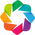

In [53]:
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

path = "C:/Users/pierr/Documents/1_projet_python/Valeur_fonciere/Depot_data/"
gv.extension('bokeh')

import geopandas as gpd
import geoviews as gv

sf_i = gpd.read_file(path + "departements-version-simplifiee.geojson")



In [60]:
sf = pd.merge(left=sf_i, right=tab , left_on='code', right_on='Code departement', how = 'left')
sf.columns
sf.columns = sf.columns.astype(str)
sf

,code,nom,geometry,2018,2019,2020,2021
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",2005.485457,2068.344315,2161.311808,2314.410827
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",1158.877916,1156.406372,1196.319668,1274.313826
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...",1057.256474,1061.119648,1085.033048,1131.529783
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...",1841.793340,1901.910819,2001.746193,2028.861040
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...",2197.853154,2186.124875,2231.937251,2367.341260
...,...,...,...,...,...,...,...
91,91,Essonne,"POLYGON ((2.22656 48.77610, 2.23298 48.76620, ...",3062.485840,3138.449145,3263.177271,3463.863926
92,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.32697 48.94536, ...",5848.451157,6206.449125,6570.861655,6953.522957
93,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.58031 48.99159, ...",3728.513062,3896.868083,4197.361072,4325.213877
94,94,Val-de-Marne,"POLYGON ((2.33190 48.81701, 2.36395 48.81632, ...",4510.041658,4656.043258,4950.558164,5055.477365


In [73]:
deps = gv.Polygons(sf, vdims=['nom','2018','2019','2020','2021'])

from geoviews import dim
gf.land.opts()
deps.opts(width=600, height=600, toolbar='above', color=dim('2018'),
          colorbar=True, tools=['hover'], aspect='equal')

:Polygons   [Longitude,Latitude]   (nom,2018,2019,2020,2021)